# Android App User Policies

In [1]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### What does a policy look like? An example:

The following policy was obtained from [UsablePrivacy.org](https://usableprivacy.org/data) the as part of the APP-350 Corpus (PETS 2019). This dataset will be used to train the models in this project. A citation is provided below:

_MAPS: Scaling Privacy Compliance Analysis to a Million Apps. Sebastian Zimmeck, Peter Story, Daniel Smullen, Abhilasha Ravichander, Ziqi Wang, Joel Reidenberg, N. Cameron Russell, and Norman Sadeh. Privacy Enhancing Technologies Symposium 2019._

In [2]:
with open(os.path.join('../data/APP-350_v1.0/original_documents/', '3.html'), 'r') as f:
    text = f.read()
    
print(re.sub(r'\<.*\>','',text))

Automatic Call Recorder - Privacy Policy
​
This document clarifies how user data and any sensitive information is handled in the app.
​
Recording Call - Microphone
We do not hold any recordings or user information on our own servers.
The app “Automatic Call Recorder” records phone calls. All recorded calls are recorded on the phone using the microphone on the device. The recorded files and related notes are stored on the phone’s storage and NO server is involved with recording phone calls. The recorded calls are not stored on our own server and can only be stored locally or on a third party cloud storage service such as Google Drive or Dropbox.
​
Storage
The app requests permission to access the phone’s storage only in order to store the recorded calls and play the recorded files afterwards. The app does not access any other files nor excess user’s photos.
​
Contacts
The app accesses the contacts on the phone in order to display the contacts that were recorded and so the app can record

### Labeled policies are necessary to train NLP models

Fortunately, Graduate Students in Law have annotated 350 Android App Policies in this dataset. An example of these annotations is displayed below.

In [4]:
data_path = '../data/APP-350_v1.0/annotations/'
with open(os.path.join(data_path, 'policy_10.yml'), 'r') as f:
    text = f.read()
    
print(text)

policy_id: 10
policy_name: CheetahMobileBatteryDoctorBrowser
policy_type: TEST
contains_synthetic: false
segments:
- segment_id: 0
  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More
    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News
    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior
    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog
    Security Topics CEO Talks Press Release About Company Information Investor Relations
    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn
    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that
    privacy is significant. This Privacy Policy ("Policy") applies to your use of
    the Battery Doctor applications on all platforms (the "Application").
  annotations: []
  sentences: []
- segment_id: 1
  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy t

**Let's get a sense of how many annotations are present, what they address, and which practices are performed or not performed**

In [5]:
cols = ['PERFORMED','NOT_PERFORMED']
files = os.listdir(data_path)
policy_dict={}
for file in files:
    with open(os.path.join(data_path, file), 'r') as f:
        text = f.readlines()
    lc = 0
    prac_dict = {}
    for line in text:
        l = line.strip()
        if 'practice:' in l:
            prac_name = l.split(':')[1].strip()
            lm = text[lc+1].strip()
            mod_name = lm.split(':')[1].strip()
            #print(prac_name, mod_name)
            if prac_name in prac_dict:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name][0] += 1
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name][1] += 1
            else:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name] = [1,0]
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name] = [0, 1]
        lc+=1
    policy_dict[file]=prac_dict

#prac_dict

In [6]:
def performed_action(lst):
    try:
        return lst[0]
    except:
        return np.nan
    
def not_performed_action(lst):
    try:
        return lst[1]
    except:
        return np.nan

In [7]:
df_policies = pd.DataFrame(policy_dict)
df_policies.head()

,policy_1.yml,policy_10.yml,policy_100.yml,policy_101.yml,policy_102.yml,policy_103.yml,policy_104.yml,policy_105.yml,policy_106.yml,policy_107.yml,...,policy_90.yml,policy_91.yml,policy_92.yml,policy_93.yml,policy_94.yml,policy_95.yml,policy_96.yml,policy_97.yml,policy_98.yml,policy_99.yml
Contact_1stParty,NaN,NaN,"[2, 0]","[2, 2]",NaN,NaN,NaN,NaN,NaN,NaN,...,"[3, 0]",NaN,NaN,"[14, 0]","[2, 0]",NaN,"[3, 0]",NaN,NaN,NaN
Contact_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[0, 2]","[4, 0]",NaN,NaN,NaN,NaN,NaN,NaN,"[4, 0]",NaN
Contact_Address_Book_1stParty,NaN,NaN,"[3, 0]","[7, 2]",NaN,NaN,NaN,NaN,"[2, 0]",NaN,...,"[3, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_Address_Book_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_City_1stParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[2, 0]",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import pickle
policy_list = df_policies.index.tolist()
#with open('../pickles/policy_list.pckl', 'wb') as p:
#    pickle.dump(policy_list, p, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
df_performed = df_policies.copy()
df_not_performed = df_policies.copy()

for col in df_policies.columns:
    df_performed[col] = df_performed[col].apply(performed_action)
    df_not_performed[col] = df_not_performed[col].apply(not_performed_action)

In [9]:
df_performed.head()

,policy_1.yml,policy_10.yml,policy_100.yml,policy_101.yml,policy_102.yml,policy_103.yml,policy_104.yml,policy_105.yml,policy_106.yml,policy_107.yml,...,policy_90.yml,policy_91.yml,policy_92.yml,policy_93.yml,policy_94.yml,policy_95.yml,policy_96.yml,policy_97.yml,policy_98.yml,policy_99.yml
Contact_1stParty,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,14.0,2.0,NaN,3.0,NaN,NaN,NaN
Contact_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Contact_Address_Book_1stParty,NaN,NaN,3.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_Address_Book_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_City_1stParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
performed_totals = (df_performed>0).sum(axis=1)
not_performed_totals = (df_not_performed>0).sum(axis=1)

In [13]:
performed_totals.index == not_performed_totals.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [11]:
df_totals = pd.DataFrame({'Performed': performed_totals, 'Not Performed': not_performed_totals})
df_totals.head()

,Performed,Not Performed
Contact_1stParty,103,30
Contact_3rdParty,17,6
Contact_Address_Book_1stParty,85,35
Contact_Address_Book_3rdParty,6,1
Contact_City_1stParty,35,10


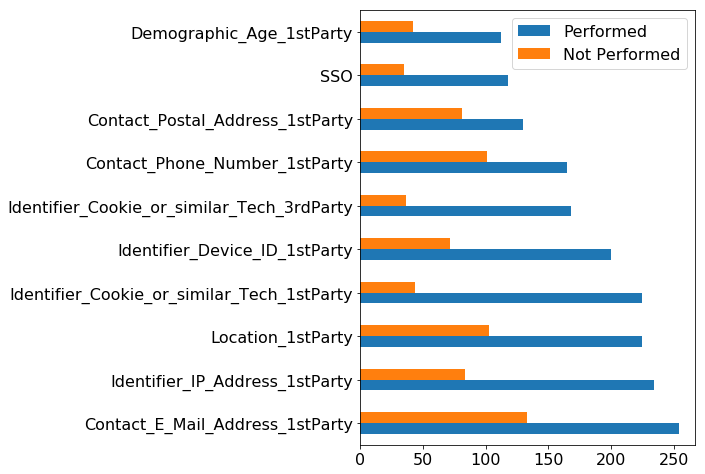

In [20]:
df_totals.sort_values(by='Performed', ascending=False).head(10).plot(kind='barh', figsize=(6,8), fontsize=16)
plt.legend(fontsize=16)

In [14]:
(df_totals['Performed'] + df_totals['Not Performed']).sort_values(ascending=False).head(20).index

Index(['Contact_E_Mail_Address_1stParty', 'Location_1stParty',
       'Identifier_IP_Address_1stParty', 'Identifier_Device_ID_1stParty',
       'Identifier_Cookie_or_similar_Tech_1stParty',
       'Contact_Phone_Number_1stParty', 'Contact_Postal_Address_1stParty',
       'Identifier_Cookie_or_similar_Tech_3rdParty',
       'Demographic_Age_1stParty', 'SSO', 'Contact_Password_1stParty',
       'Identifier_IP_Address_3rdParty', 'Contact_1stParty',
       'Demographic_Gender_1stParty', 'Facebook_SSO', 'Location_GPS_1stParty',
       'Contact_Address_Book_1stParty', 'Location_3rdParty',
       'Identifier_Device_ID_3rdParty', 'Location_WiFi_1stParty'],
      dtype='object')

In [22]:
ordered_policies = ['Contact_E_Mail_Address_1stParty', 'Location_1stParty',
       'Identifier_IP_Address_1stParty', 'Identifier_Device_ID_1stParty',
       'Identifier_Cookie_or_similar_Tech_1stParty',
       'Contact_Phone_Number_1stParty', 'Contact_Postal_Address_1stParty',
       'Identifier_Cookie_or_similar_Tech_3rdParty',
       'Demographic_Age_1stParty', 'SSO', 'Contact_Password_1stParty',
       'Identifier_IP_Address_3rdParty', 'Contact_1stParty', 'Facebook_SSO',
       'Demographic_Gender_1stParty', 'Location_GPS_1stParty',
       'Contact_Address_Book_1stParty', 'Location_3rdParty',
       'Identifier_Device_ID_3rdParty', 'Location_WiFi_1stParty',
       'Location_IP_Address_1stParty', 'Demographic_1stParty',
       'Location_Cell_Tower_1stParty', 'Contact_E_Mail_Address_3rdParty',
       'Identifier_Ad_ID_1stParty', 'Identifier_MAC_1stParty',
       'Location_Bluetooth_1stParty', 'Identifier_1stParty',
       'Identifier_Mobile_Carrier_1stParty', 'Identifier_IMEI_1stParty',
       'Contact_ZIP_1stParty', 'Identifier_Ad_ID_3rdParty',
       'Demographic_3rdParty', 'Contact_City_1stParty',
       'Location_GPS_3rdParty', 'Contact_Phone_Number_3rdParty',
       'Location_IP_Address_3rdParty', 'Contact_Postal_Address_3rdParty',
       'Location_Cell_Tower_3rdParty', 'Identifier_MAC_3rdParty',
       'Location_WiFi_3rdParty', 'Demographic_Age_3rdParty',
       'Location_Bluetooth_3rdParty', 'Identifier_3rdParty',
       'Demographic_Gender_3rdParty', 'Contact_3rdParty',
       'Identifier_SIM_Serial_1stParty', 'Identifier_IMEI_3rdParty',
       'Contact_ZIP_3rdParty', 'Identifier_Mobile_Carrier_3rdParty',
       'Identifier_SSID_BSSID_1stParty', 'Identifier_IMSI_1stParty',
       'Contact_Password_3rdParty', 'Contact_Address_Book_3rdParty',
       'Contact_City_3rdParty', 'Identifier_SIM_Serial_3rdParty',
       'Identifier_IMSI_3rdParty', 'Identifier_SSID_BSSID_3rdParty']

ordered_policies_clean = [a.replace('_',' ') for a in ordered_policies]
ordered_policies_clean

['Contact E Mail Address 1stParty',
 'Location 1stParty',
 'Identifier IP Address 1stParty',
 'Identifier Device ID 1stParty',
 'Identifier Cookie or similar Tech 1stParty',
 'Contact Phone Number 1stParty',
 'Contact Postal Address 1stParty',
 'Identifier Cookie or similar Tech 3rdParty',
 'Demographic Age 1stParty',
 'SSO',
 'Contact Password 1stParty',
 'Identifier IP Address 3rdParty',
 'Contact 1stParty',
 'Facebook SSO',
 'Demographic Gender 1stParty',
 'Location GPS 1stParty',
 'Contact Address Book 1stParty',
 'Location 3rdParty',
 'Identifier Device ID 3rdParty',
 'Location WiFi 1stParty',
 'Location IP Address 1stParty',
 'Demographic 1stParty',
 'Location Cell Tower 1stParty',
 'Contact E Mail Address 3rdParty',
 'Identifier Ad ID 1stParty',
 'Identifier MAC 1stParty',
 'Location Bluetooth 1stParty',
 'Identifier 1stParty',
 'Identifier Mobile Carrier 1stParty',
 'Identifier IMEI 1stParty',
 'Contact ZIP 1stParty',
 'Identifier Ad ID 3rdParty',
 'Demographic 3rdParty',
 'Con

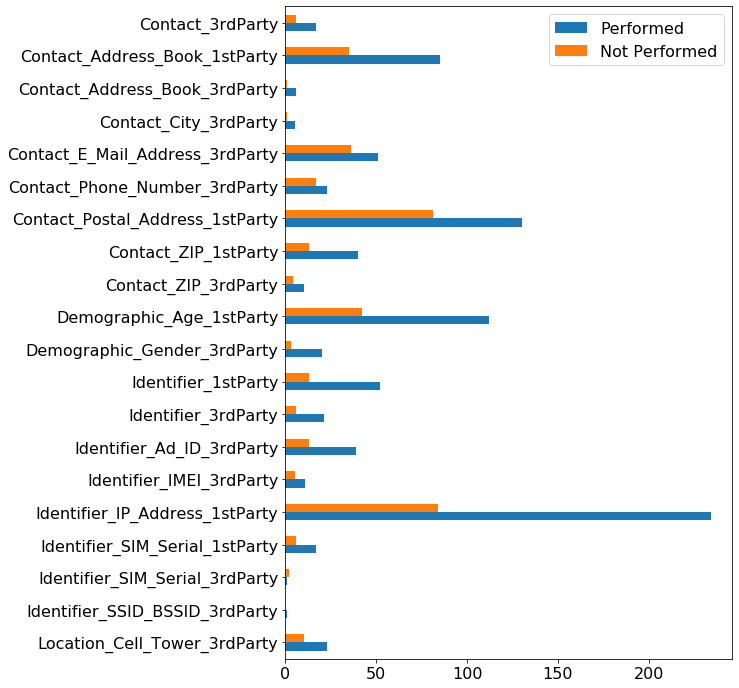

In [15]:
df_totals.sample(20).sort_index(ascending=False).plot(kind='barh', figsize=(8,12), fontsize=16)
plt.legend(fontsize=16)

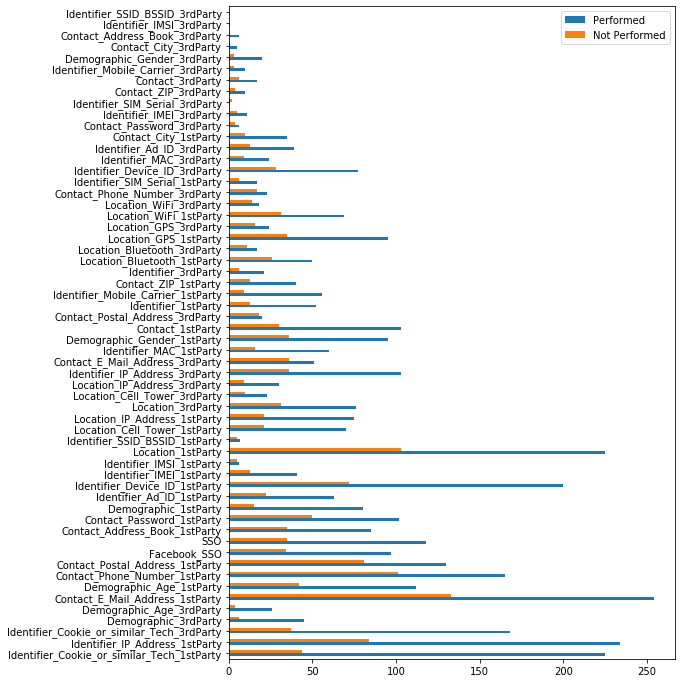

In [15]:
df_totals.plot(kind='barh', figsize=(8,12))